Encrypted Image Analysis:
Entropy: [np.float64(7.9993037914898135), np.float64(7.999194163597417), np.float64(7.999297788315572)]
Variance: [np.float64(5441.744202835118), np.float64(5466.412407966429), np.float64(5444.656413153687)]
Correlation Coefficient (H, V, D): [(np.float64(0.001759514253609914), np.float64(0.001184123231585996), np.float64(0.0026456415805457293)), (np.float64(-1.513882164624876e-05), np.float64(-0.0009529334766039053), np.float64(-0.0013210847907540516)), (np.float64(-0.0014433722320102724), np.float64(-0.0010578120115836513), np.float64(-0.0012429363148646676))]
Chi-Squared: [np.float64(252.86328125), np.float64(293.365234375), np.float64(256.169921875)]
P-Values: [np.float64(0.5260461101745919), np.float64(0.0495133505356058), np.float64(0.46762523223519303)]
NPCR: [np.float64(99.609375), np.float64(99.58267211914062), np.float64(99.61700439453125)]
UACI: [np.float64(29.886105107326134), np.float64(28.596870571959254), np.float64(31.105611464556524)]

Origina

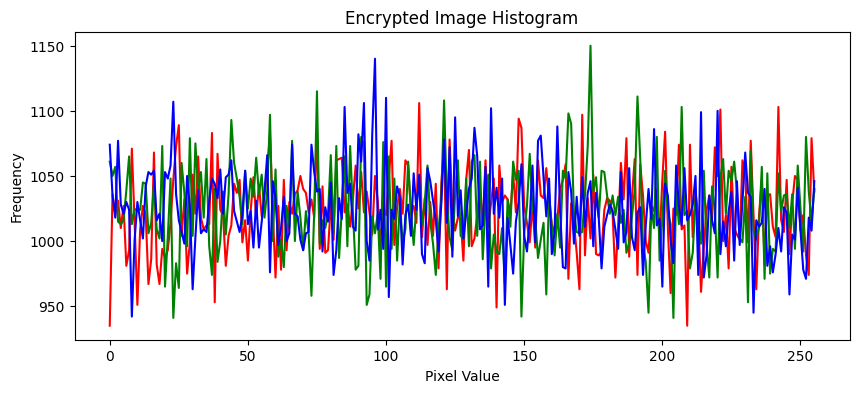

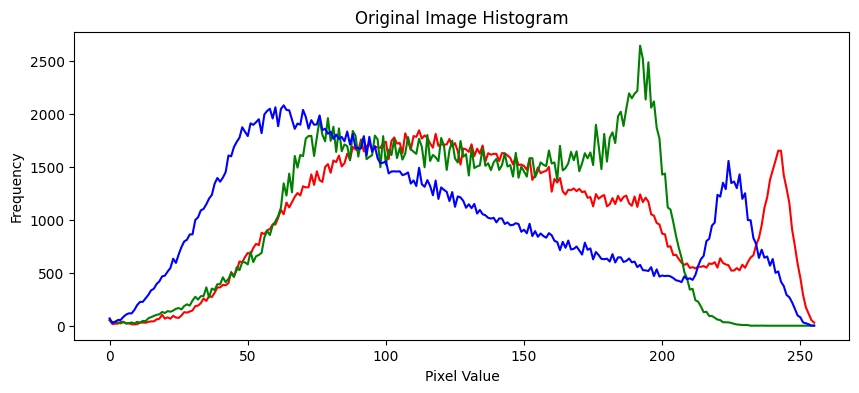

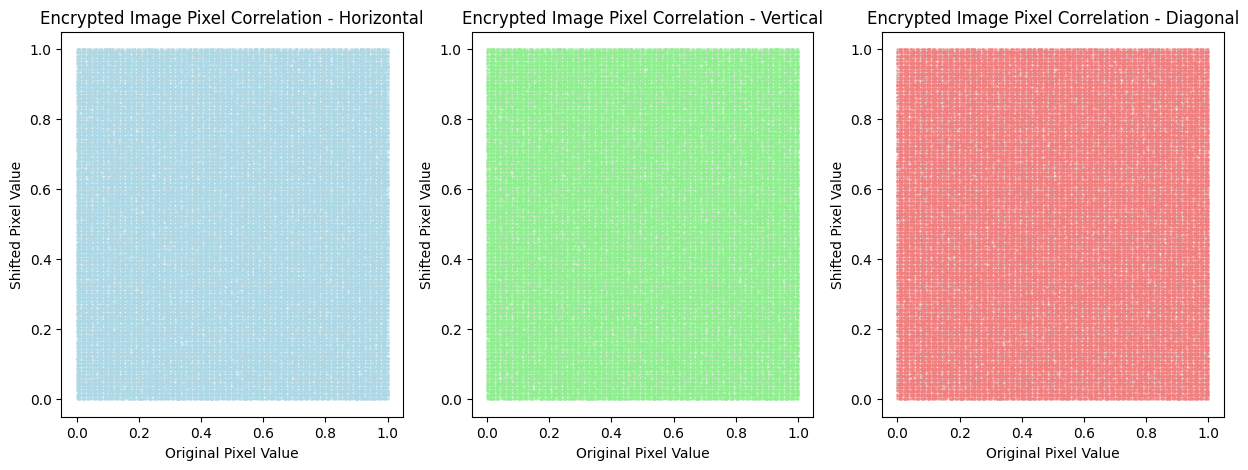

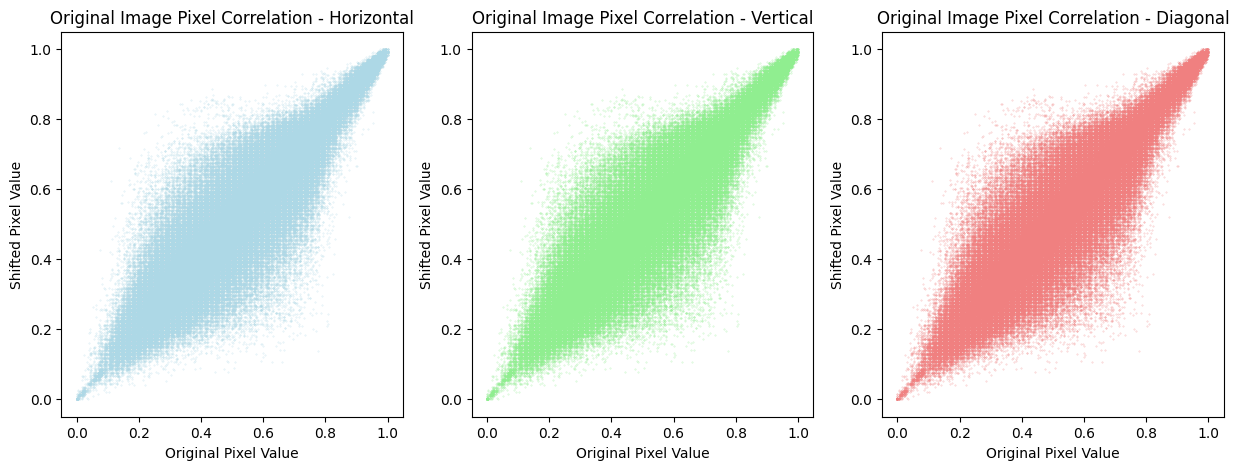

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, entropy

def calculate_entropy(image):
    """Calculate entropy for each RGB channel."""
    entropies = []
    for i in range(3):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hist = hist.ravel() / hist.sum()
        entropies.append(entropy(hist, base=2))
    return entropies

def calculate_variance(image):
    """Calculate variance for each RGB channel."""
    variances = []
    for i in range(3):
        variances.append(np.var(image[:, :, i]))
    return variances

def calculate_correlation(image):
    """Calculate correlation coefficients for horizontal, vertical, and diagonal shifts."""
    correlations = []
    for i in range(3):
        img = image[:, :, i].astype(np.float32) / 255.0
        shift_right = np.roll(img, -1, axis=1)
        shift_down = np.roll(img, -1, axis=0)
        shift_diag = np.roll(img, (-1, -1), axis=(0, 1))
        correlation_x = np.corrcoef(img.ravel(), shift_right.ravel())[0, 1]
        correlation_y = np.corrcoef(img.ravel(), shift_down.ravel())[0, 1]
        correlation_diag = np.corrcoef(img.ravel(), shift_diag.ravel())[0, 1]
        correlations.append((correlation_x, correlation_y, correlation_diag))
    return correlations

def chi_squared_test(image):
    """Perform chi-squared test for each RGB channel."""
    chi2_stats = []
    p_values = []
    for i in range(3):
        hist, _ = np.histogram(image[:, :, i].flatten(), bins=256, range=(0, 256))
        expected = np.ones(256) * np.mean(hist)
        chi2_stat, p_value = chisquare(hist, expected)
        chi2_stats.append(chi2_stat)
        p_values.append(p_value)
    return chi2_stats, p_values

def calculate_npcr_uaci(original, encrypted):
    """Calculate NPCR and UACI for each RGB channel."""
    height, width, _ = original.shape
    npcr_values = []
    uaci_values = []
    for i in range(3):
        diff = original[:, :, i] != encrypted[:, :, i]
        npcr = np.sum(diff) / (height * width) * 100
        uaci = np.sum(np.abs(original[:, :, i].astype(np.int16) - encrypted[:, :, i].astype(np.int16))) / (height * width * 255) * 100
        npcr_values.append(npcr)
        uaci_values.append(uaci)
    return npcr_values, uaci_values

def plot_histogram(image, title="Image Histogram"):
    """Plot histogram for each RGB channel."""
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 4))
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

def plot_correlation(image, title="Pixel Correlation"):
    """Plot correlation scatter plots."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    shifts = [("Horizontal", (0, 1)), ("Vertical", (1, 0)), ("Diagonal", (1, 1))]
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for i, (name, shift) in enumerate(shifts):
        img = image[:, :, 0].astype(np.float32) / 255.0
        shifted = np.roll(img, -1, axis=shift[0]) if shift[0] else np.roll(img, -1, axis=shift[1])
        axes[i].scatter(img.ravel(), shifted.ravel(), s=0.1, color=colors[i], alpha=0.5)
        axes[i].set_title(f"{title} - {name}")
        axes[i].set_xlabel("Original Pixel Value")
        axes[i].set_ylabel("Shifted Pixel Value")
    plt.show()

# Load images
encrypted_image_path = "encrypted_gradient_BaboonRGB.bmp"
original_image_path = "BaboonRGB.bmp"

encrypted_image = cv2.imread(encrypted_image_path)
original_image = cv2.imread(original_image_path)

if encrypted_image is None or original_image is None:
    print("Error: One or both images could not be loaded.")
else:
    encrypted_image = cv2.cvtColor(encrypted_image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Compute metrics
    entropy_encrypted = calculate_entropy(encrypted_image)
    variance_encrypted = calculate_variance(encrypted_image)
    correlation_encrypted = calculate_correlation(encrypted_image)
    chi2_encrypted, p_values_encrypted = chi_squared_test(encrypted_image)

    entropy_original = calculate_entropy(original_image)
    variance_original = calculate_variance(original_image)
    correlation_original = calculate_correlation(original_image)
    chi2_original, p_values_original = chi_squared_test(original_image)

    npcr_values, uaci_values = calculate_npcr_uaci(original_image, encrypted_image)

    # Display results
    print("Encrypted Image Analysis:")
    print(f"Entropy: {entropy_encrypted}")
    print(f"Variance: {variance_encrypted}")
    print(f"Correlation Coefficient (H, V, D): {correlation_encrypted}")
    print(f"Chi-Squared: {chi2_encrypted}")
    print(f"P-Values: {p_values_encrypted}")
    print(f"NPCR: {npcr_values}")
    print(f"UACI: {uaci_values}\n")

    print("Original Image Analysis:")
    print(f"Entropy: {entropy_original}")
    print(f"Variance: {variance_original}")
    print(f"Correlation Coefficient (H, V, D): {correlation_original}")
    print(f"Chi-Squared: {chi2_original}")
    print(f"P-Values: {p_values_original}\n")

    # Plot results
    plot_histogram(encrypted_image, "Encrypted Image Histogram")
    plot_histogram(original_image, "Original Image Histogram")
    plot_correlation(encrypted_image, "Encrypted Image Pixel Correlation")
    plot_correlation(original_image, "Original Image Pixel Correlation")
